# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [1]:
# %matplotlib inline
    
from numpy import nan
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]]) \
    .stack()
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

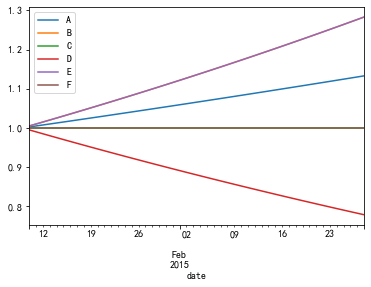

In [3]:
prices.plot()

In [4]:
prices.head()

,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0


In [5]:
factor.head(10)

date         
2015-01-15  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-16  A    3.0
            D    1.0
            E    4.0
            F    2.0
2015-01-17  A    3.0
            B    4.0
dtype: float64

In [6]:
factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 3), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [7]:
factor_data.head(10)

1D        3D  factor   group  factor_quantile
date       asset                                                   
2015-01-15 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4
           C      0.0000  0.000000     2.0  Group1                2
           D     -0.0050 -0.014925     1.0  Group2                1
2015-01-16 A      0.0025  0.007519     3.0  Group1                3
           D     -0.0050 -0.014925     1.0  Group2                1
           E      0.0050  0.015075     4.0  Group1                4
           F      0.0000  0.000000     2.0  Group2                2
2015-01-17 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4

In [8]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)

C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning:

invalid value encountered in true_divide



c:\users\liude\repos\alphalens\alphalens\utils.py:916: UserWarning:

Skipping return periods that aren't exact multiples of days.



                            -3        -2        -1         0         1  \
factor_quantile                                                          
1               mean  0.916880  0.912296  0.907734  0.903196  0.898680   
                std   0.040452  0.040250  0.040048  0.039848  0.039649   
2               mean  1.000000  1.000000  1.000000  1.000000  1.000000   
                std   0.000000  0.000000  0.000000  0.000000  0.000000   
3               mean  1.044908  1.047520  1.050139  1.052765  1.055396   
                std   0.022967  0.023025  0.023082  0.023140  0.023198   
4               mean  1.092221  1.097683  1.103171  1.108687  1.114230   
                std   0.047948  0.048187  0.048428  0.048670  0.048914   

                             2         3         4         5         6  \
factor_quantile                                                          
1               mean  0.894186  0.889715  0.885267  0.880840  0.876436   
                std   0.039451  0.039

In [9]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=True)

C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning:

invalid value encountered in true_divide



c:\users\liude\repos\alphalens\alphalens\utils.py:916: UserWarning:

Skipping return periods that aren't exact multiples of days.



                            -3        -2        -1         0         1  \
factor_quantile                                                          
1               mean -0.096622 -0.102079 -0.107527 -0.112966 -0.118397   
                std   0.048060  0.047983  0.047907  0.047831  0.047757   
2               mean -0.013502 -0.014375 -0.015261 -0.016162 -0.017077   
                std   0.007630  0.007755  0.007880  0.008004  0.008129   
3               mean  0.031406  0.033146  0.034878  0.036603  0.038320   
                std   0.015353  0.015286  0.015218  0.015151  0.015084   
4               mean  0.078719  0.083308  0.087910  0.092525  0.097154   
                std   0.040326  0.040441  0.040557  0.040674  0.040792   

                             2         3         4         5         6  \
factor_quantile                                                          
1               mean -0.123819 -0.129234 -0.134640 -0.140038 -0.145428   
                std   0.047684  0.047

In [10]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=True, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=True, by_group=True)

c:\users\liude\repos\alphalens\alphalens\utils.py:916: UserWarning:

Skipping return periods that aren't exact multiples of days.



                           -3        -2        -1         0         1   \
factor_quantile                                                          
1               mean -0.064827 -0.068486 -0.072139 -0.075789 -0.079434   
                std   0.044442  0.045196  0.045984  0.046806  0.047660   
2               mean  0.009420  0.009913  0.010399  0.010877  0.011348   
                std   0.035897  0.037554  0.039222  0.040900  0.042587   
3               mean -0.000390 -0.000448 -0.000509 -0.000574 -0.000643   
                std   0.026245  0.027513  0.028798  0.030099  0.031416   
4               mean  0.055796  0.059020  0.062250  0.065486  0.068729   
                std   0.049097  0.050363  0.051660  0.052987  0.054340   

                            2         3         4         5         6   \
factor_quantile                                                          
1               mean -0.083074 -0.086711 -0.090343 -0.093971 -0.097595   
                std   0.048545  0.049